In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [107]:
df = pd.read_csv('train_E6oV3lV.csv')

In [108]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [109]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [110]:
df1 = df.query('label==1').sample(frac=1.0)

In [111]:
df1.shape

(2242, 3)

In [112]:
n_df = pd.concat([df,df1],ignore_index=True)
n_df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,4484,4484


In [113]:
count_class_0, count_class_1 = df['label'].value_counts()

In [114]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [115]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [116]:
df_under.shape

(4484, 3)

In [117]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [118]:
df = df_under

In [119]:
X = df['tweet']
Y = df['label']
Y_org = Y

In [120]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [121]:
max(df['tweet'], key=len)

' @user #cuandojuegachilemepongo   ð\x9f\x92\x83 saaaaaaaaa shhhhhhhe iiiiiiið\x9f\x87¨ð\x9f\x87±ð\x9f\x87¨ð\x9f\x87±ð\x9f\x87¨ð\x9f\x87±ð\x9f\x87¨ð\x9f\x87±ð\x9f\x87¨ð\x9f\x87± #vamoschile #vamoschilecarajo #copaamerica  â\x9d¤ï¸\x8f'

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

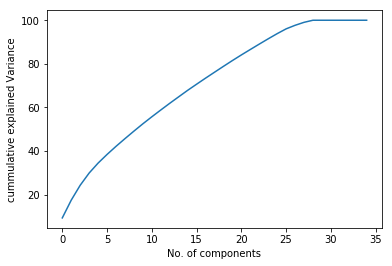

In [124]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [127]:
classifier = Sequential()
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu' ,input_dim =X.shape[1]))
classifier.add(Dropout(0.1))

In [128]:
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2,kernel_initializer='uniform', activation='sigmoid'))

In [129]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [130]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [131]:
Y_train

<3587x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [132]:
Y_test

<897x2 sparse matrix of type '<class 'numpy.float64'>'
	with 897 stored elements in Compressed Sparse Row format>

In [133]:
checker = classifier.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data = (X_test, Y_test))

Train on 3587 samples, validate on 897 samples
Epoch 1/100
3587/3587 [==============================] - 1s 312us/step - loss: 0.6889 - acc: 0.5605 - val_loss: 0.6610 - val_acc: 0.6650
Epoch 2/100
3587/3587 [==============================] - 1s 155us/step - loss: 0.6442 - acc: 0.6512 - val_loss: 0.6191 - val_acc: 0.6918
Epoch 3/100
3587/3587 [==============================] - 1s 163us/step - loss: 0.6301 - acc: 0.6645 - val_loss: 0.6160 - val_acc: 0.6912
Epoch 4/100
3587/3587 [==============================] - 1s 163us/step - loss: 0.6272 - acc: 0.6674 - val_loss: 0.6129 - val_acc: 0.7007
Epoch 5/100
3587/3587 [==============================] - 1s 165us/step - loss: 0.6253 - acc: 0.6735 - val_loss: 0.6125 - val_acc: 0.7029
Epoch 6/100
3587/3587 [==============================] - 1s 165us/step - loss: 0.6216 - acc: 0.6735 - val_loss: 0.6101 - val_acc: 0.6990
Epoch 7/100
3587/3587 [==============================] - 1s 163us/step - loss: 0.6184 - acc: 0.6759 - val_loss: 0.6086 - val_acc: 0

3587/3587 [==============================] - 1s 153us/step - loss: 0.5014 - acc: 0.7621 - val_loss: 0.5460 - val_acc: 0.7525
Epoch 61/100
3587/3587 [==============================] - 1s 154us/step - loss: 0.4966 - acc: 0.7675 - val_loss: 0.5417 - val_acc: 0.7492
Epoch 62/100
3587/3587 [==============================] - 1s 156us/step - loss: 0.4935 - acc: 0.7720 - val_loss: 0.5428 - val_acc: 0.7458
Epoch 63/100
3587/3587 [==============================] - 1s 152us/step - loss: 0.5069 - acc: 0.7611 - val_loss: 0.5485 - val_acc: 0.7414
Epoch 64/100
3587/3587 [==============================] - 1s 158us/step - loss: 0.4957 - acc: 0.7675 - val_loss: 0.5464 - val_acc: 0.7397
Epoch 65/100
3587/3587 [==============================] - 1s 163us/step - loss: 0.4952 - acc: 0.7648 - val_loss: 0.5409 - val_acc: 0.7425
Epoch 66/100
3587/3587 [==============================] - 1s 161us/step - loss: 0.5016 - acc: 0.7672 - val_loss: 0.5525 - val_acc: 0.7430
Epoch 67/100
3587/3587 [=======================

In [134]:
Y_pred_test_label = classifier.predict(X_test)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.76      0.72      0.74       443
          1       0.74      0.78      0.76       454

avg / total       0.75      0.75      0.75       897



In [136]:
print(classification_report(Y_train_true,y_pred_train))

             precision    recall  f1-score   support

          0       0.85      0.75      0.80      1799
          1       0.78      0.87      0.82      1788

avg / total       0.81      0.81      0.81      3587



In [137]:
from sklearn.metrics import confusion_matrix

In [102]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1295  240]
 [ 504 1548]]

Test:  
 [[288 111]
 [155 343]]


In [138]:
### for sigmoid function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1358  241]
 [ 441 1547]]

Test:  
 [[317  99]
 [126 355]]
